In [1]:
import yaml
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os

   Epoch  Learning Rate  Training Loss  Training Mask Ratio  Training SSIM  \
0      1       0.000041       0.313498             0.717814       0.884580   
1      2       0.000043       0.279652             0.730170       0.889974   
2      3       0.000046       0.271490             0.715401       0.894757   
3      4       0.000050       0.262181             0.746328       0.898657   
4      5       0.000056       0.257705             0.733776       0.901162   

   Training MSE  Training MAE  Validation Loss  Validation Mask Ratio  \
0      0.002117      0.030926         0.268531               0.651899   
1      0.001843      0.028688         0.255161               0.651899   
2      0.001740      0.027784         0.246005               0.651899   
3      0.001628      0.026706         0.242624               0.651899   
4      0.001533      0.025931         0.241733               0.651899   

   Validation SSIM  Validation MSE  Validation MAE  
0         0.909410        0.001735     

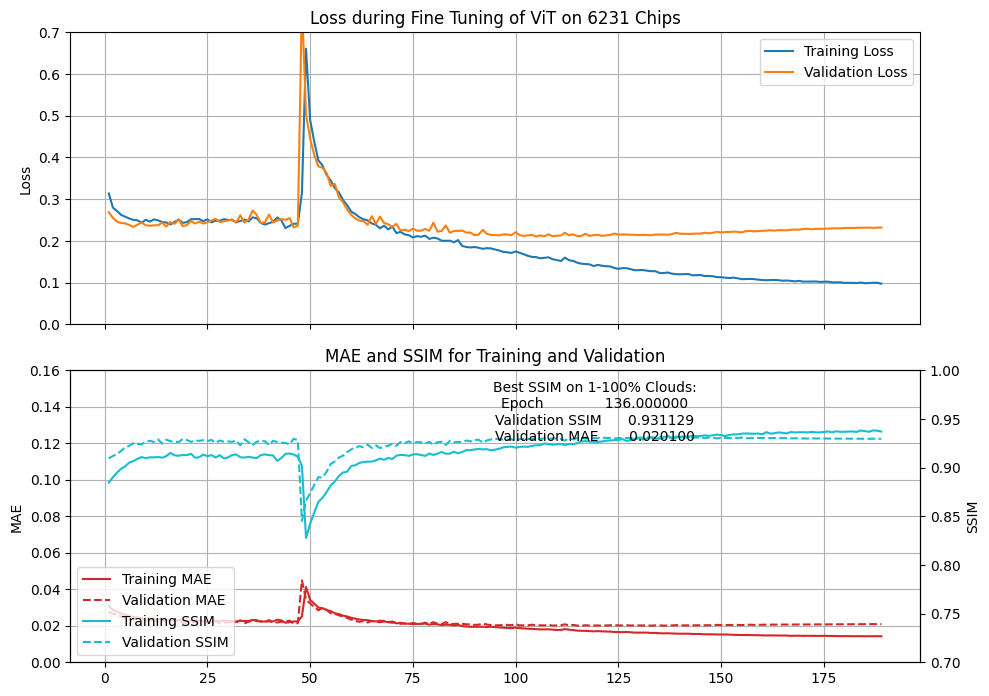

In [25]:
# Load the YAML file
yaml_file_path = Path("/workspace/data/lchu/hls/jobs/6231-fair-bs16-2023-08-21_16-49-34.yaml")  # Replace with the actual path to your YAML file
with open(yaml_file_path, "r") as file:
    yaml_data = yaml.safe_load(file)

training_length = yaml_data["training_length"]
# Access the file path from the YAML data
data_file_path = Path(yaml_data["csv_dir"]) / "summary.txt"

# Read the .txt file as a CSV using pandas
df = pd.read_csv(data_file_path, sep=',', header=None)

column_names = ["Epoch","Learning Rate","Training Loss","Training Mask Ratio","Training SSIM","Training MSE","Training MAE","Validation Loss","Validation Mask Ratio","Validation SSIM","Validation MSE", "Validation MAE"]
df.columns = column_names

# Display the DataFrame
print(df.head())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Training Loss"], color="tab:blue", label="Training Loss")
ax1.plot(df["Epoch"], df["Validation Loss"], color="tab:orange", label="Validation Loss")

ax1.set_ylabel("Loss")
ax1.set_title(f"Loss during Fine Tuning of ViT on {training_length} Chips")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM"].idxmax(), [0,-3,-1]])[:90], fontsize=10, y=0.4, x = 0.6)
ax1.legend()
ax1.set_ylim(0, 0.7)
ax1.grid(True)

# Plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MAE"], color="tab:red", label="Training MAE")
ax2.plot(df["Epoch"], df["Validation MAE"], color="tab:red", linestyle="--", label="Validation MAE")
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 0.16)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

# Adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MAE and SSIM for Training and Validation")
ax2.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
save_dir = Path(yaml_data["visualization_dir"])
os.makedirs(save_dir, exist_ok=True)
filename = 'training_graph.png'
print(str(save_dir / filename))
plt.savefig(save_dir / filename, format='png')